# Numerical exercises 10

Before running this notebook you need to...

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.style as style 
style.use('tableau-colorblind10')

In the following exercises we study the TSP again, at first using a _Simulated annealing_ algorithm, and then using parallelized genetic algorithm, and in both cases we will compare the results with the ones of the previous lecture.

# Exercise 10.1
## Brief overview of Simulated Annealing

The Simulated Annealing (SA) algorithm comes from an analogy with thermodynamics: when a system is **slowly** (in order to avoid metastable states) cooled down, it reaches the energy minimum.

The main result of this analogy is to consider the loss function $L_{1}(x)$ as the "energy" of the system, so that we define the following Boltzmann like probability distribution:

$$
p(x)= \frac{e^{-\beta L_{1}(x)}}{Z}, \\
$$

So, by increasing $\beta$ we will slowly decrease the "temperature" of the system, and at each MC step we will sample the following distribution with a Metropolis algorithm:

$$
P= \begin{cases}
      e^{-\beta (L_{1}(\vec x') -L_{1}(\vec x))}, & \text{if } L_{1}(\vec x') > L_{1}(\vec x)  \\
      1, & \text{otherwise,}
    \end{cases}
$$

where each of $N$ total cycles will start from the previous final configuration.

In [16]:
shape = ('square', 'circumference')
for i in range(2) : 
    res = open("build/ex10.1/results/ga_results_"+shape[i]+".txt", "r")
    data = res.read()
    print(data)
for i in range(2) : 
    res = open("build/ex10.1/results/sa_results_"+shape[i]+".txt", "r")
    data = res.read()
    print(data)

------------------------------
Genetic Algorithm
32 cities on a square;
Population of 1000 salesmen;
Evolution of 200 generations. 

Best initial loss value: 25.6488
Best final loss value: 9.85561

------------------------------
Genetic Algorithm
32 cities on a circumference;
Population of 1000 salesmen;
Evolution of 200 generations. 

Best initial loss value: 28.0603
Best final loss value: 6.21109

------------------------------
Simulated Annealing Algorithm
32 cities on a square;
500 temperatures to be considered;
2000 steps to be made for each temperature. 

Best initial loss value: 35.4166
Final loss value: 9.85561

------------------------------
Simulated Annealing Algorithm
32 cities on a circumference;
500 temperatures to be considered;
100 steps to be made for each temperature. 

Best initial loss value: 41.9986
Final loss value: 6.21109



In [17]:
def path(shape) :
    x,y = (np.genfromtxt('build/ex10.1/results/sa_cities_'+shape+ '.dat', usecols=i, autostrip=True) for i in range(2))
    plt.subplots(figsize=(12,6))
    plt.subplot(1,2,1)
    if  shape == 'circumference' :
        theta=np.linspace(0,2.*3.141593,num=200)    
        sinn=np.sin(theta); coss=np.cos(theta)
        plt.plot(coss,sinn,color='k',linewidth=0.4)
    plt.plot(x,y, '*-', markersize=8, label='Path')
    plt.plot(x[0],y[0],'*', markersize=10, label='Start')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc=0)
    plt.title('Initial SalesMan\'s Path ')

    x,y = (np.genfromtxt('build/ex10.1/results/sa_cities_final_'+ shape +'.dat', usecols=i, autostrip=True) for i in range(2))
    plt.subplot(1,2,2)
    plt.plot(x,y, '*-', markersize=8, label='Path')
    if  shape == 'circumference' :
        plt.plot(coss,sinn,color='k',linewidth=0.4)
    plt.plot(x[0],y[0],'*', markersize=10, label='Start')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Final SalesMan\'s Path')
    plt.legend(loc=0)

    plt.suptitle('Path evolution on '+shape)
    plt.tight_layout()
    plt.show()

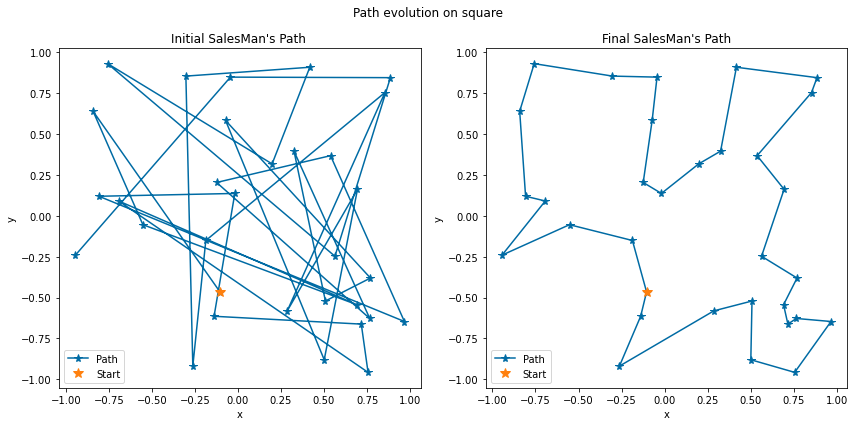

In [18]:
path('square')

In [19]:
def loss(shape):
    generation, fitness = (np.genfromtxt('build/ex10.1/results/sa_loss_'+shape+'.dat', usecols=i, autostrip=True) for i in range(2))

    fig,ax=plt.subplots(figsize=(12,5))
    plt.plot(generation, fitness, '-',linewidth=1.5, label="Simulated Annealing's length")
    if shape=='square' : 
        plt.axhline(y=9.85561,linewidth=1.5,linestyle='--', color='orange',label="Genetic Algorithm's length")
    elif shape== 'circumference' :
        plt.axhline(y= 6.21109,linewidth=1.5,linestyle='--', color='orange',label="Genetic Algorithm's length")
    plt.xlabel('$β$')
    plt.ylabel(r'$\langle L_1\rangle$')
    plt.title('Progression of length estimation for path on a '+shape)
    plt.legend(loc=1)
    plt.grid(True)

    axins=inset_axes(ax,5.6,2.8,loc=1)
    axins.plot(generation, fitness, 'o-',markersize=3, label="Simulated Annealing's length")
    if shape=='square' : 
        axins.axhline(y=9.85561,linewidth=1.5,linestyle='--', color='orange',label="Genetic Algorithm's length")
        axins.set_xlim(0, 100)
        axins.set_ylim(9, 13)
    elif shape== 'circumference' :
        axins.set_xlim(400, 450)
        axins.axhline(y=6.21109,linewidth=1.5,linestyle='--', color='orange',label="Genetic Algorithm's length")
        axins.set_ylim(6, 7.5)
    plt.grid(True)
    plt.legend(loc=1)
    plt.yticks(visible=True)
    plt.xticks(visible=True)
    mark_inset(ax,axins,loc1=3,loc2=4,fc='none',ec='0.6')

    plt.show()

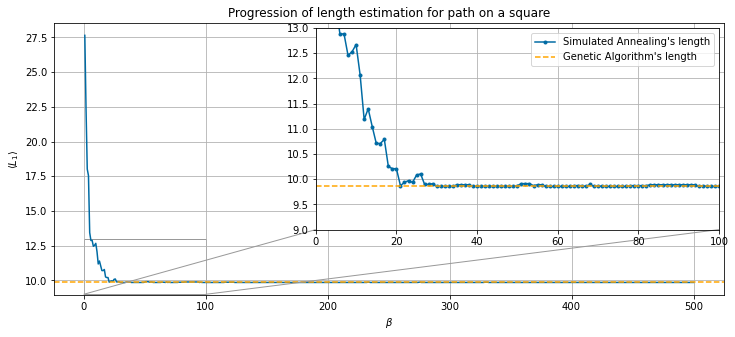

In [20]:
loss('square')

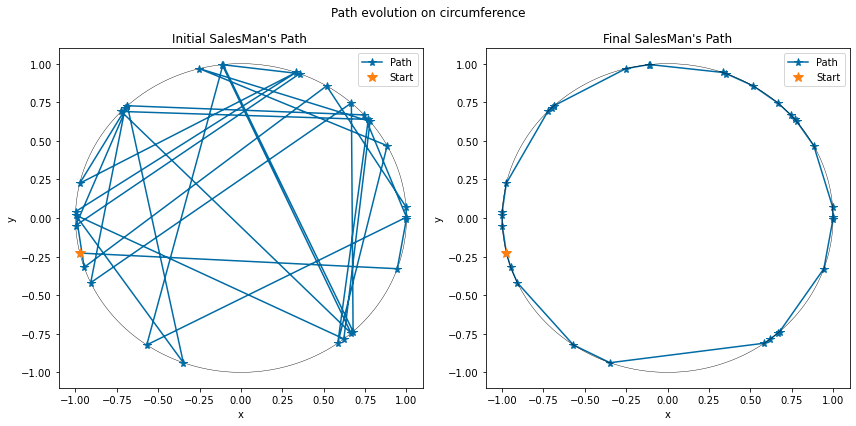

In [21]:
path('circumference')

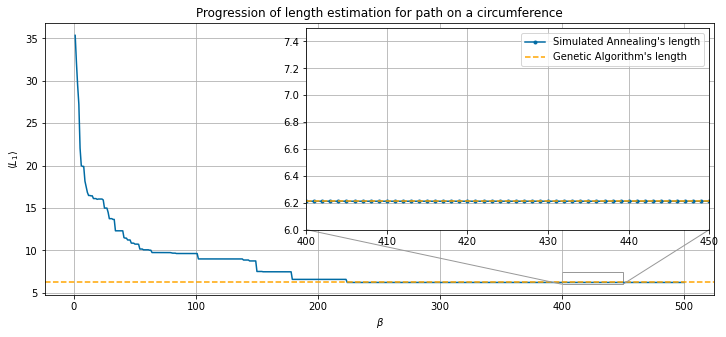

In [22]:
loss('circumference')

# Exercise 10.2
As previously mentioned, in this exercise we will use the [MPI library](https://www.mpi-forum.org/) to parallelize our genetic algorithm. 

Our model falls into the **Single Program Multiple Data (SPMD)** model, where the same executable is used to process different sets of data.